In [12]:
from sklearn.datasets import fetch_openml
import pickle


mnist_download=fetch_openml('mnist_784',version=1)
mnist_download.keys()
f = open("mnist.pkl", "wb")
pickle.dump(mnist_download,f)

In [13]:
import pickle

mnist = pickle.load(open("mnist.pkl", "rb"))

In [14]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<IPython.core.display.Javascript object>


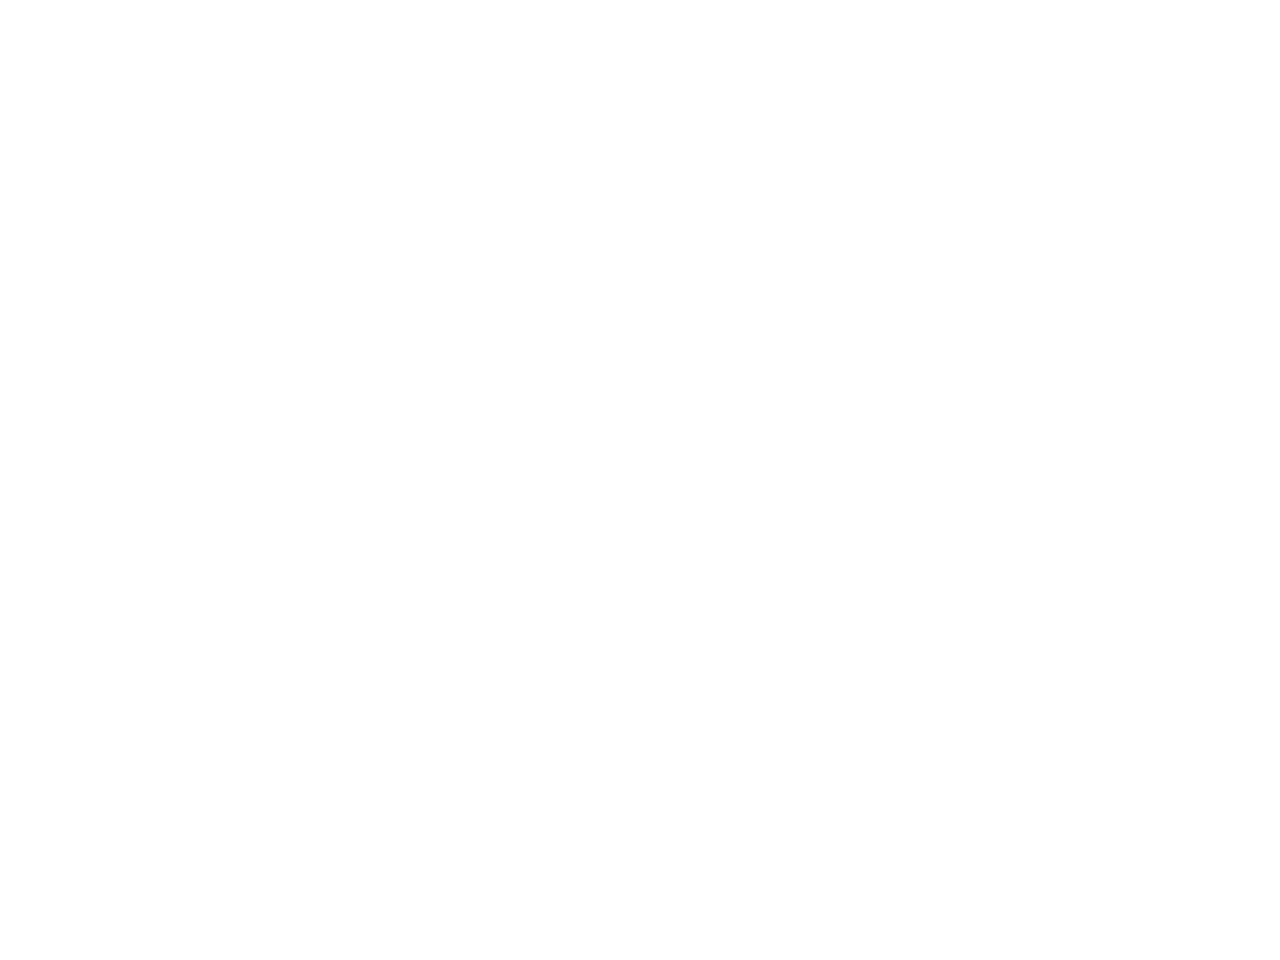

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [16]:
y[0]

'5'

In [17]:
import numpy as np
y = y.astype(np.uint8)

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_test_fold))

0.95035
0.96035
0.9604


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [23]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.0997 , 0.0965 , 0.09995])

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) #fraction of positive predictions that are true

0.8370879772350012

In [27]:
recall_score(y_train_5, y_train_pred) #fraction of positive instances that are correctly predicted

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0
y_some_digit_predict = y_scores > threshold
y_some_digit_predict

array([ True])

In [31]:
threshold = 200000
y_some_digit_predict = y_scores > threshold
y_some_digit_predict

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [35]:
y_train_pred_90 = y_scores > 7000

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9308681672025724

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.32042058660763695

<IPython.core.display.Javascript object>


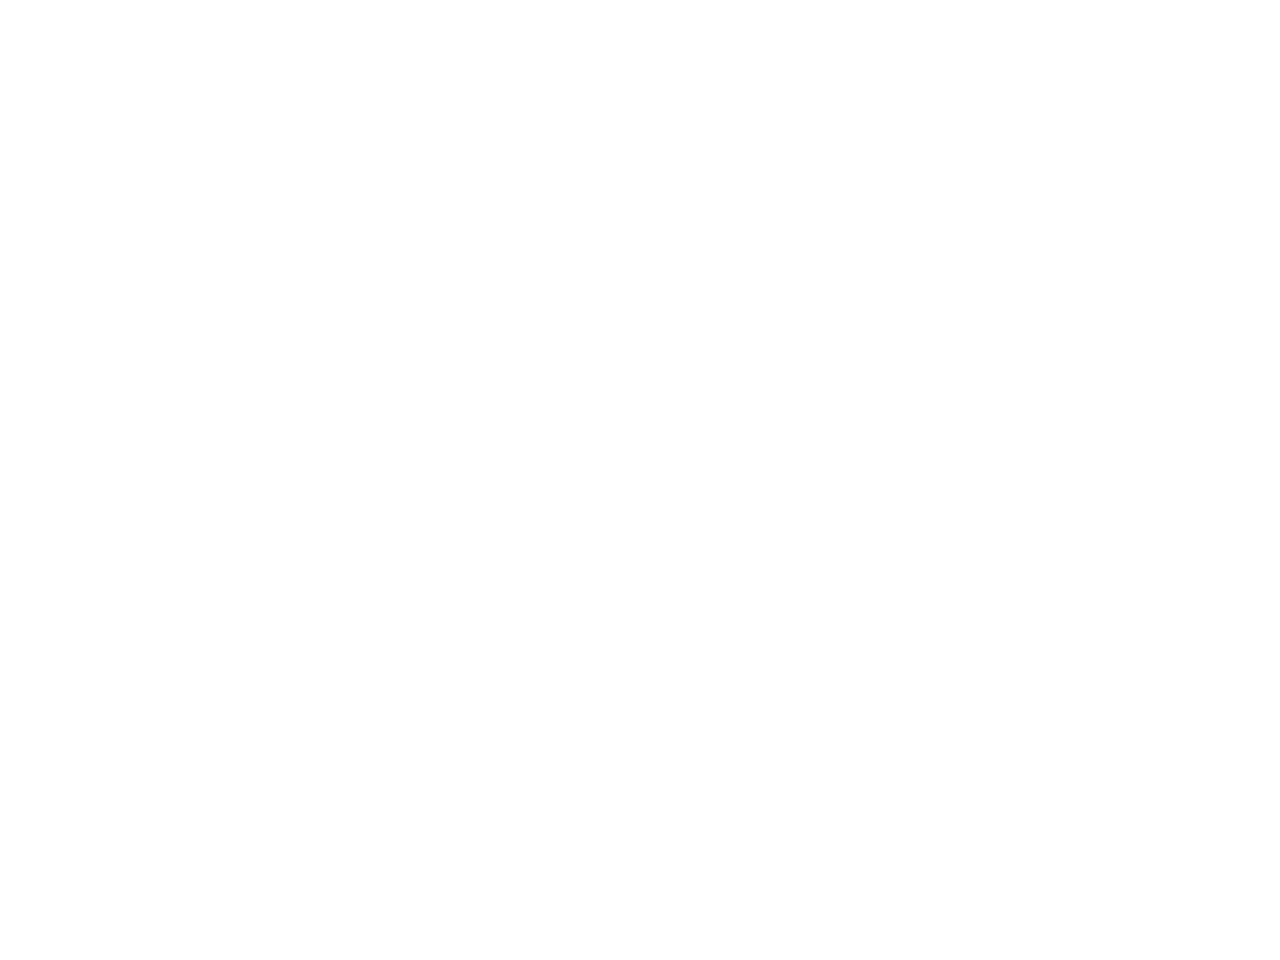

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    %matplotlib notebook
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<IPython.core.display.Javascript object>


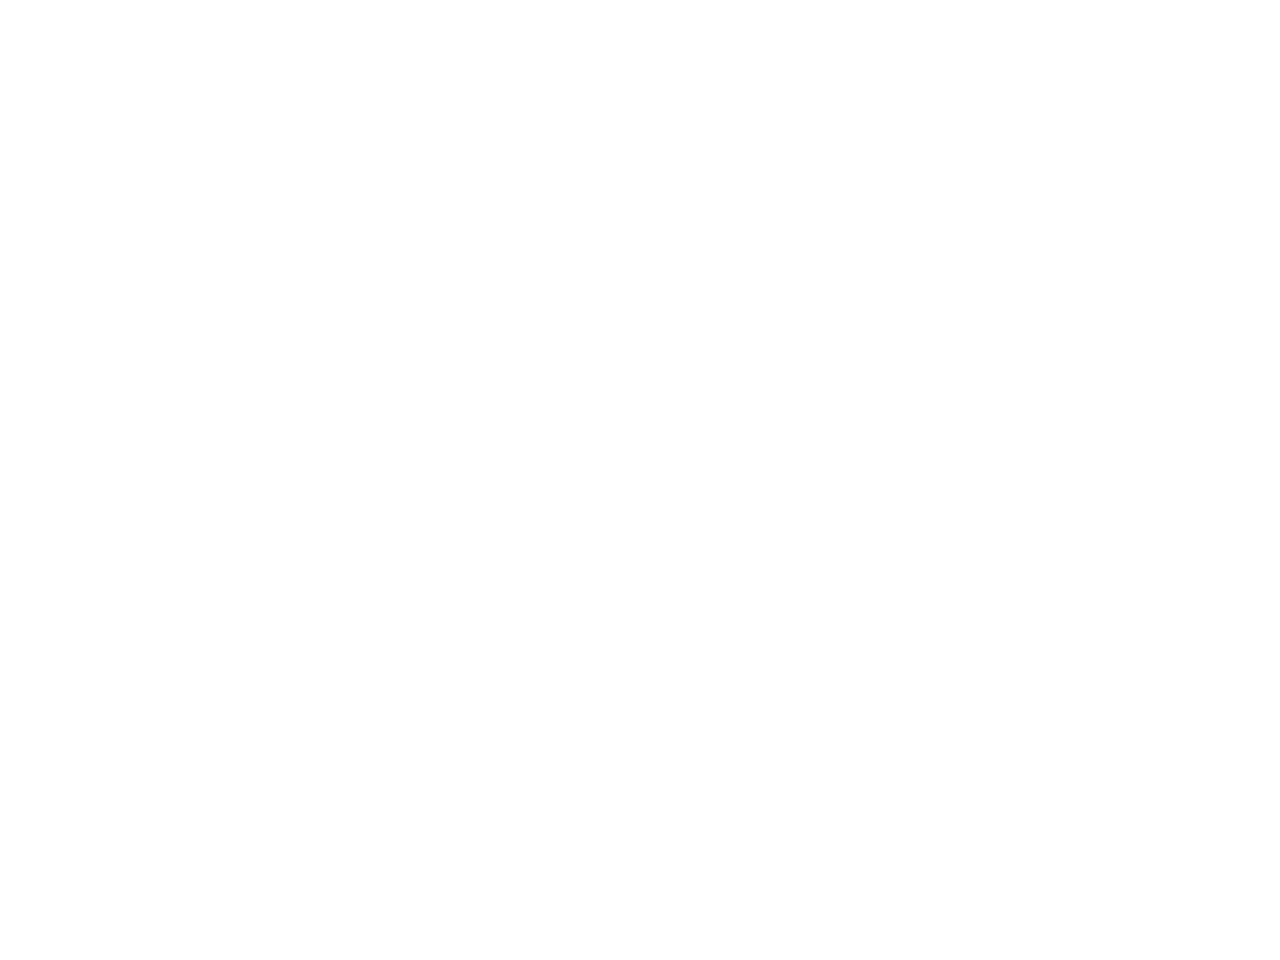

<IPython.core.display.Javascript object>


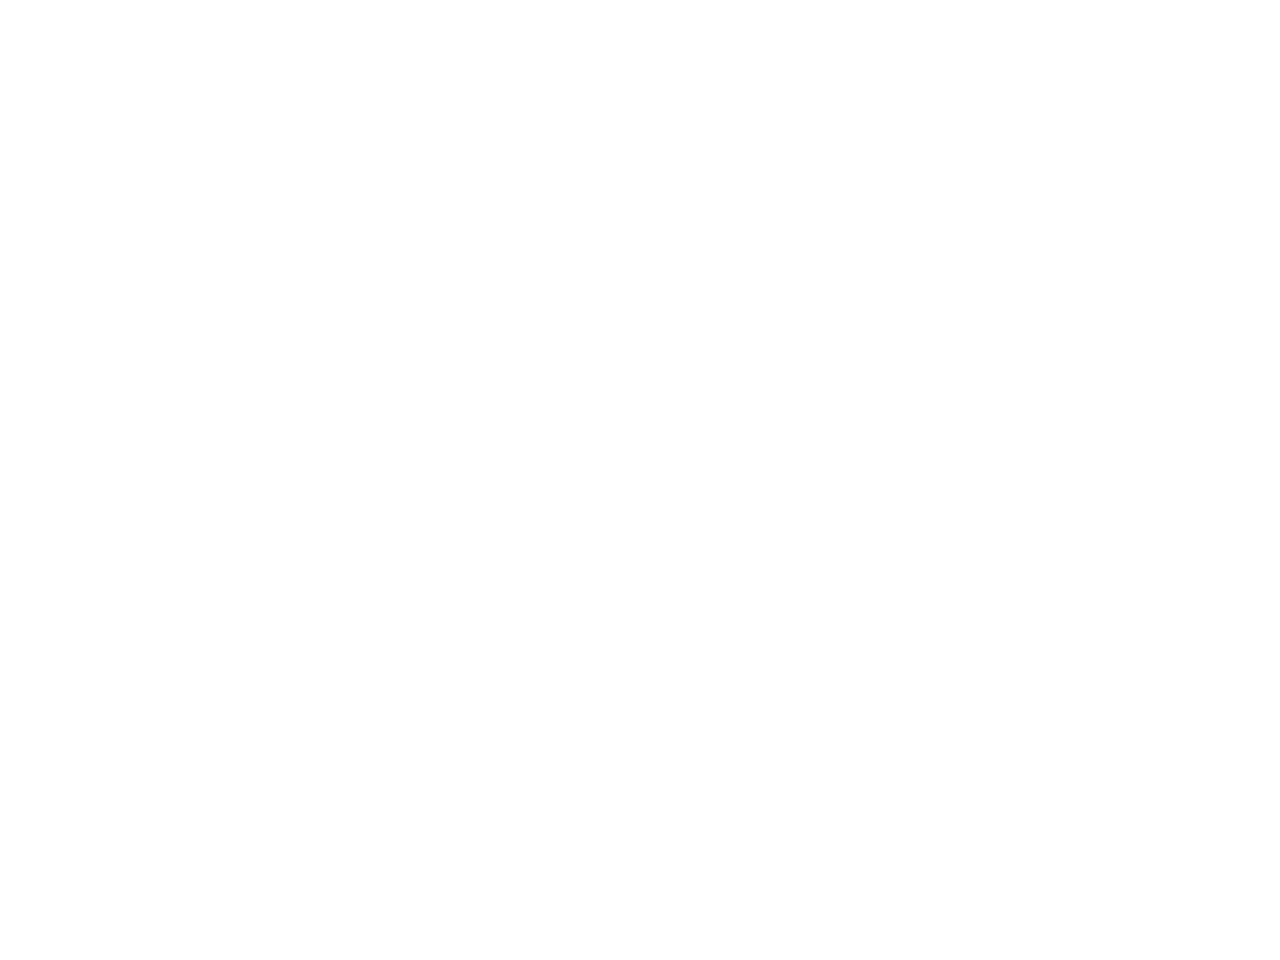

In [41]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
%matplotlib notebook
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend("lower right")
plt.show()

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

In [43]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [44]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [45]:
np.argmax(some_digit_scores)
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [46]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

45

In [47]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [48]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [49]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [50]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]])

<IPython.core.display.Javascript object>


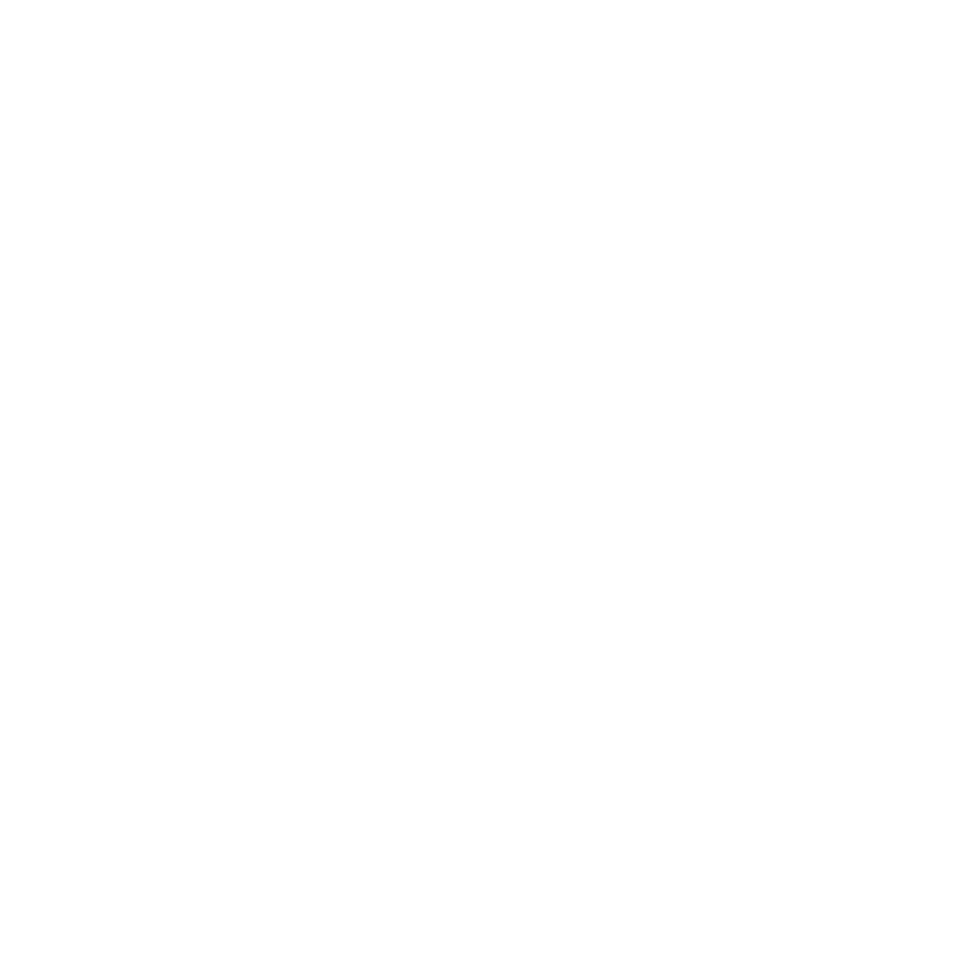

In [53]:
%matplotlib notebook
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


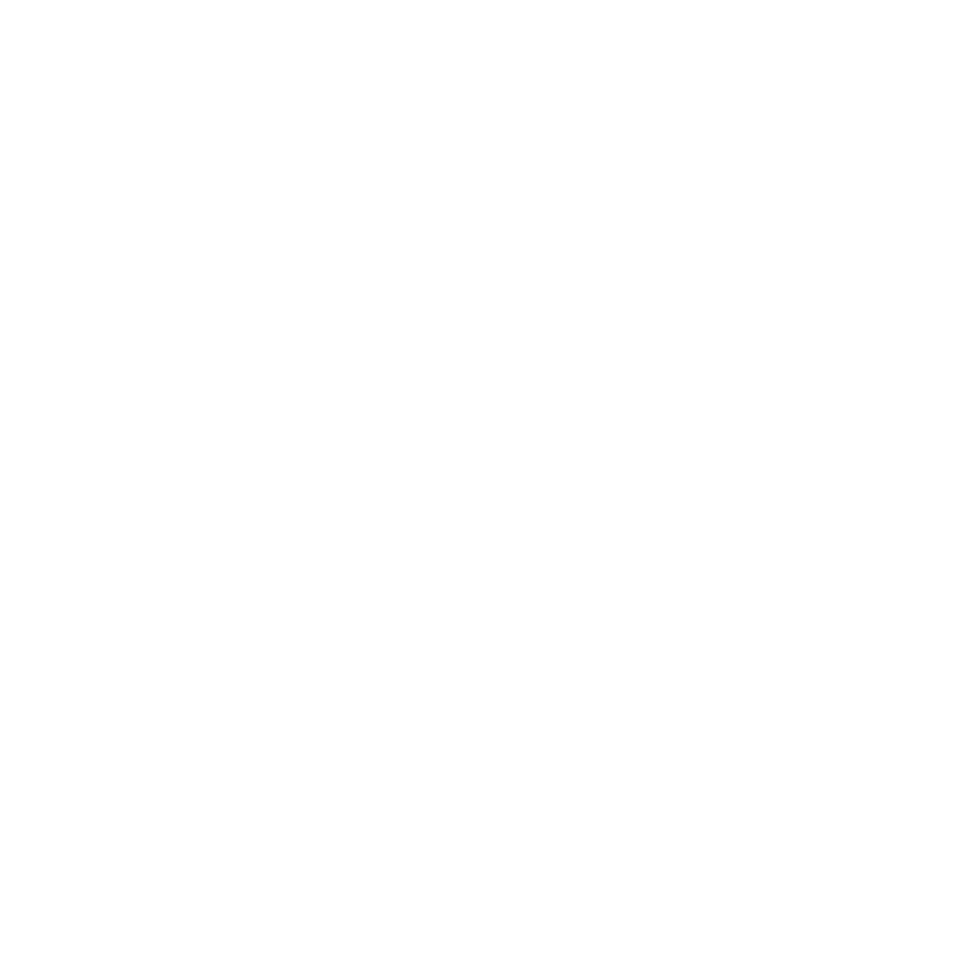

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
%matplotlib notebook
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [55]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [56]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

%matplotlib notebook
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

<IPython.core.display.Javascript object>

In [57]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [59]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [60]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [61]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [62]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'some_index' is not defined

In [ ]:
import dill
dill.dump_session('chapter3_1.db')

In [ ]:
pip install dill

In [ ]:
import dill
dill.load_session('chapter3_1.db')

In [ ]:
import pickle

mnist = pickle.load(open("mnist.pkl", "rb"))

In [ ]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [ ]:
y[0]

In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [4, 5, 6, 7],
    'weights': ['uniform']
}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, n_jobs=-1)

In [ ]:
X_train_small = X_train[:5000]
y_train_small = y_train[:5000]

In [ ]:
grid_search.fit(X_train_small, y_train_small)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

knn_clf = grid_search.best_estimator_
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3, n_jobs=-1)
f1_score(y_train, y_train_knn_pred, average="macro")

In [ ]:
import pickle
f = open("chapter3_knn_clf.pkl", "wb")
pickle.dump(knn_clf,f)
f.close()

In [ ]:
import pickle
f = open("chapter3_knn_clf.pkl", "rb")
knn_clf = pickle.load(f)
f.close()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='uniform')
scores = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs=-1)

In [ ]:
scores

In [ ]:
X_train[0].reshape(28, 28)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdb 

# direction is an int, 0 = right, 1 = down, etc.
def shift_image(image, direction):
    two_d_image = image.copy().reshape(28, 28)
    horizontalDirection = direction == 0 or direction == 2
    positiveDirection = direction == 0 or direction == 1
    increment = 1 if positiveDirection else -1
    verticalRange = list(reversed(range(len(two_d_image)-1))) if positiveDirection else range(1, len(two_d_image))
    horizontalRange = list(reversed(range(len(two_d_image[0])-1))) if positiveDirection else range(1, len(two_d_image[0]))
    
    for v in verticalRange:  
        if(horizontalDirection):
            for h in horizontalRange:  
                two_d_image[v][h+increment] = two_d_image[v][h]
        else:
            two_d_image[v+increment] = two_d_image[v]
    image = two_d_image.reshape(784)
    return image
   
def show_image(image):
    %matplotlib notebook
    reshaped_image = image.reshape(28,28)
    plt.figure()
    plt.imshow(reshaped_image, cmap = mpl.cm.binary, interpolation='nearest')
    

In [ ]:
show_image(X_train[0])

In [ ]:
shifted_image = shift_image(X_train[0], 1)
show_image(shifted_image)

In [ ]:
X_train_lengthened = list(X_train.copy())
y_train_lengthened = list(y_train.copy())
for index in range(len(X_train)):
    for shiftDirection in [0, 1, 2, 3]:
        X_train_lengthened.append(shift_image(X_train[index], shiftDirection))
        y_train_lengthened.append(y_train[index])
X_train_lengthened = np.array(X_train_lengthened)
y_train_lengthened = np.array(y_train_lengthened)

In [ ]:
len(X_train)

In [ ]:
len(X_train_lengthened)

In [ ]:
len(y_train_lengthened)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='uniform')
scores = cross_val_score(knn_clf, X_train_lengthened, y_train_lengthened, cv=3, n_jobs=-1)

In [ ]:
type(X_train_lengthened)

In [ ]:
len(X_train_lengthened[0])

In [ ]:
itemLength = len(X_train_lengthened[0])
index = 0
for item in X_train_lengthened:
    if(len(item) != itemLength):
        print("mismatched length of " + str(len(item)) + " for item ", item)
        break
    index += 1

In [ ]:
len(X_train_lengthened[0])

In [ ]:
X_train_lengthened.ndim

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn_clf_fitted_to_original_data = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_clf_fitted_to_original_data.fit(X_train, y_train)
knn_clf_fitted_to_lengthened_data = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_clf_fitted_to_lengthened_data.fit(X_train_lengthened, y_train_lengthened)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [63]:
import pickle
f = open("chapter3_knn_clf_fitted_to_original_data.pkl", "wb")
pickle.dump(knn_clf_fitted_to_original_data,f)
f.close()

In [64]:
import pickle
f = open("chapter3_knn_clf_fitted_to_lengthened_data.pkl", "wb")
pickle.dump(knn_clf_fitted_to_lengthened_data,f)
f.close()

In [65]:
y_test_pred_original_data = knn_clf_fitted_to_original_data.predict(X_test)
y_test_pred_lengthened_data = knn_clf_fitted_to_lengthened_data.predict(X_test)

scores_original_data = f1_score(y_test, y_test_pred_original_data, average="macro")
scores_lengthened_data = f1_score(y_test, y_test_pred_lengthened_data, average="macro")

In [66]:
scores_original_data

0.9680653871474595

In [67]:
scores_lengthened_data

0.9755811117281515